In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.models as model



In [2]:
data_path = r"/Users/pranavi/Downloads/Data Science/tomato/val"

In [3]:
img_size = 120

In [4]:
img_transform = transforms.Compose([transforms.Resize((img_size, img_size)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])])

In [9]:
img_data = ImageFolder(data_path, transform= img_transform)

In [12]:
len(img_data)

1000

In [13]:
train_data, test_data = random_split(img_data, [700,300])

In [14]:
train_loader = DataLoader(train_data, batch_size=64, shuffle = True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [15]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 3, 120, 120]) torch.Size([64])


In [16]:
def show_img_batch(data):
    for images, labels in data:
        plt.figure(figsize=(20,10))
        plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
        plt.show()
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


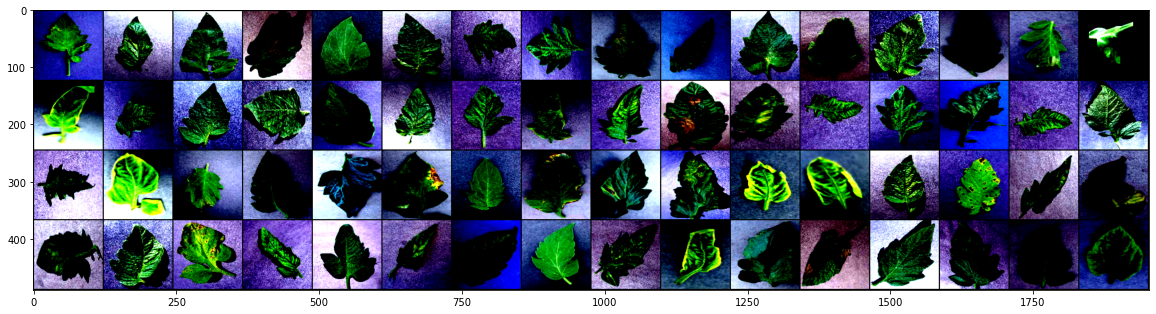

In [17]:
show_img_batch(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


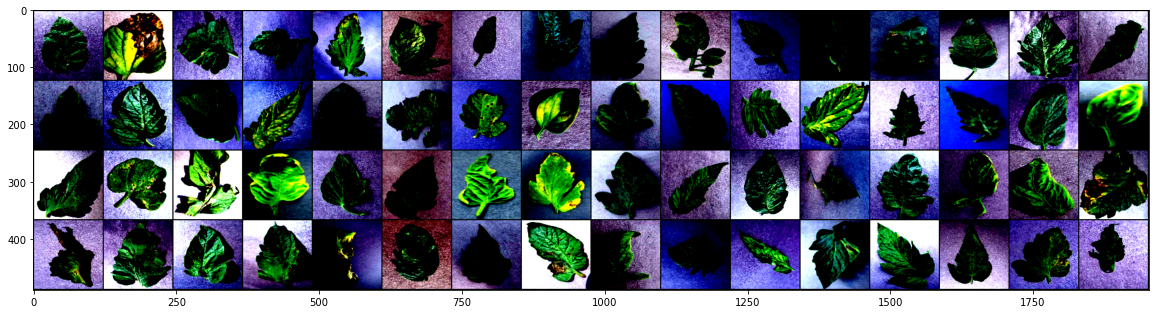

In [18]:
show_img_batch(test_loader)

In [19]:
model = model.vgg16(pretrained=True)

In [20]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

model.fc

In [22]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [23]:
model.classifier[6].out_features=10

In [24]:
for param in model.features.parameters():
    param.requires_grad = False

In [25]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [26]:
def CNN_train(loss_fn, optimizer):
    
    epochs = 10
    
    training_acc = []
    training_loss = []
    testing_acc = []
    testing_loss = []
    
    for epoch in range(epochs):
        
        train_acc = 0.0
        train_loss = 0.0
        
        model.eval()
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = loss_fn(output, labels)
            
            loss.backward()
            optimizer.step()
            
            predictions = torch.argmax(output,1)
            
            train_acc += (predictions == labels).sum().item()
            train_loss += loss.item()
            
        training_acc.append(train_acc/len(train_data))
        training_loss.append(train_loss/len(train_loader))
        
        model.eval()
        
        test_acc = 0.0
        test_loss = 0.0
        
        with torch.no_grad():
            for images, labels in test_loader:
                output = model(images)
                loss = loss_fn(output, labels)
                
                predictions = torch.argmax(output,1)
                
                test_acc += (predictions == labels).sum().item()
                test_loss += loss.item()
            
            testing_acc.append(test_acc/len(test_data))
            testing_loss.append(test_loss/len(test_loader))
        
        print("Epochs:{},Training Accuracy:{:.2f},Training Loss:{:.2f},Testing Accuracy:{:.2f},Testing Loss:{:.2f}".format(
        epoch+1, train_acc/len(train_data), train_loss/len(train_loader), test_acc/len(test_data),
        test_loss/len(test_loader)))
        
    plt.title("Accuracy Vs Epochs")
    plt.plot(range(epochs), training_acc, label="Training Accuracy")
    plt.plot(range(epochs), testing_acc, label = "Testing Accuracy")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()
    
    plt.title("Loss Vs Epochs")
    plt.plot(range(epochs), training_loss, label="Training Loss")
    plt.plot(range(epochs), testing_loss, label = "Testing Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
            

Epochs:1,Training Accuracy:0.12,Training Loss:12.82,Testing Accuracy:0.17,Testing Loss:5.73
Epochs:2,Training Accuracy:0.20,Training Loss:3.33,Testing Accuracy:0.33,Testing Loss:1.94
Epochs:3,Training Accuracy:0.48,Training Loss:1.47,Testing Accuracy:0.43,Testing Loss:1.59
Epochs:4,Training Accuracy:0.66,Training Loss:1.04,Testing Accuracy:0.61,Testing Loss:1.12
Epochs:5,Training Accuracy:0.79,Training Loss:0.65,Testing Accuracy:0.66,Testing Loss:1.01
Epochs:6,Training Accuracy:0.85,Training Loss:0.45,Testing Accuracy:0.70,Testing Loss:0.88
Epochs:7,Training Accuracy:0.91,Training Loss:0.30,Testing Accuracy:0.68,Testing Loss:0.94
Epochs:8,Training Accuracy:0.95,Training Loss:0.20,Testing Accuracy:0.74,Testing Loss:0.89
Epochs:9,Training Accuracy:0.97,Training Loss:0.14,Testing Accuracy:0.76,Testing Loss:0.75
Epochs:10,Training Accuracy:0.98,Training Loss:0.09,Testing Accuracy:0.74,Testing Loss:0.85


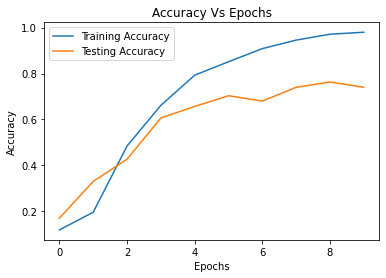

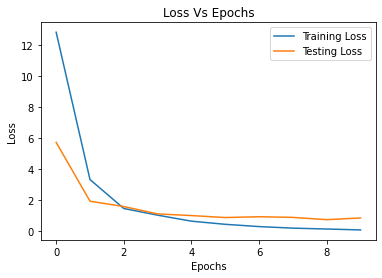

In [27]:
CNN_train(loss_fn, optimizer)